In [26]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from binance import Client
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [35]:
import sys
sys.path.insert(1, '/Users/arsenchik/Desktop/dipploma/machine_learning_in_hft/algotrading/backtesting')
from backtest import * 
from strategies import *
from config import *

url = config.DATABASE_URL_1MINUTE
time_frame = config.INTERVAL_1MINUTE
td_days = 0

In [36]:
client = Client()
engine = create_engine(url=url)

In [37]:
with engine.connect() as connection:
    query = "SELECT name FROM sqlite_schema WHERE type='table'"
    symbols = [item[0] for item in connection.execute(text(query)).fetchall()]
    # for symbol in symbols:
    #     qry = f"SELECT * FROM '{symbol}' WHERE Open_Time < '{pd.to_datetime('today') - timedelta(days = td_days)}'"
    #     data = pd.DataFrame(connection.execute(text(qry))).set_index("Open_Time")
    #     data.index = pd.to_datetime(data.index)
    symbol = symbols[0]
    qry = f"SELECT * FROM '{symbol}' WHERE Open_Time < '{pd.to_datetime('today') - timedelta(days = td_days)}'"
    data = pd.DataFrame(connection.execute(text(qry))).set_index("Open_Time")
    data.index = pd.to_datetime(data.index)

connection.close()

In [38]:
print(symbol)
data

SOLUSDT


,Open,High,Low,Close,Volume,Close_Time
Open_Time,,,,,,
2023-01-10 22:23:00,16.30,16.30,16.27,16.27,5400.05,2023-01-10 22:23:59.999000
2023-01-10 22:24:00,16.28,16.33,16.27,16.32,3864.89,2023-01-10 22:24:59.999000
2023-01-10 22:25:00,16.33,16.33,16.31,16.31,1894.63,2023-01-10 22:25:59.999000
2023-01-10 22:26:00,16.31,16.32,16.30,16.30,830.85,2023-01-10 22:26:59.999000
2023-01-10 22:27:00,16.31,16.32,16.30,16.30,1904.65,2023-01-10 22:27:59.999000
...,...,...,...,...,...,...
2023-02-09 22:19:00,21.29,21.29,21.21,21.23,3931.91,2023-02-09 22:19:59.999000
2023-02-09 22:20:00,21.23,21.23,21.18,21.22,5902.07,2023-02-09 22:20:59.999000
2023-02-09 22:21:00,21.22,21.22,21.18,21.19,572.81,2023-02-09 22:21:59.999000


In [39]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close_Time'], dtype='object')

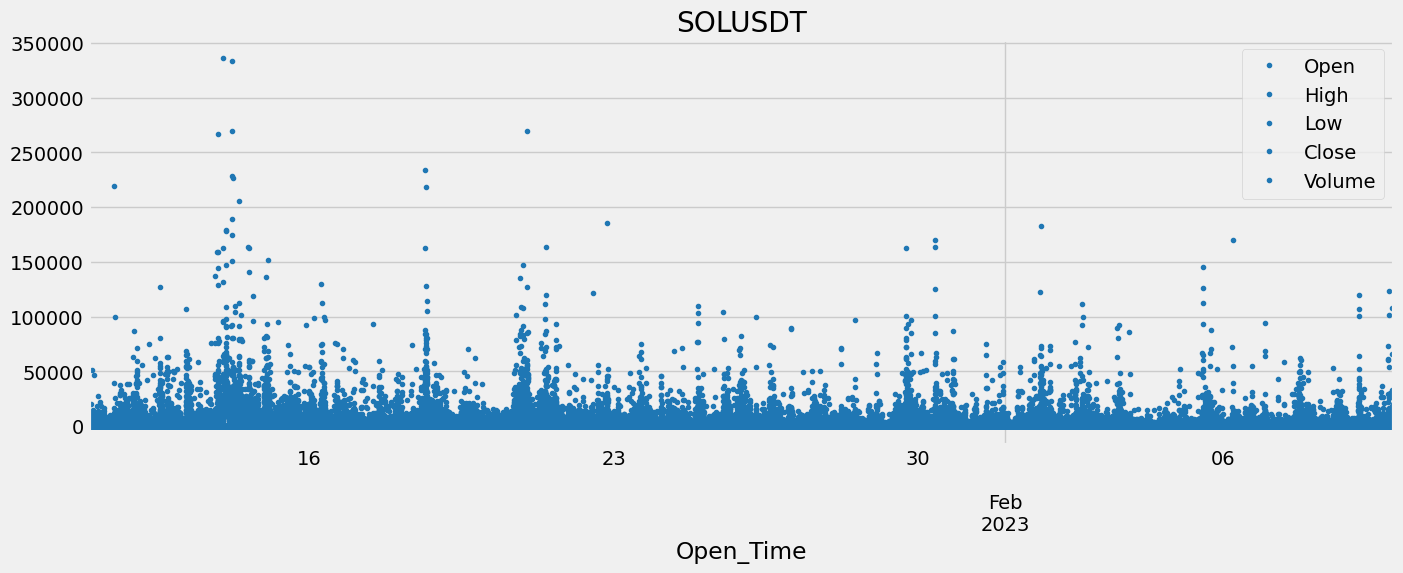

In [40]:
data.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='SOLUSDT')
plt.show()

<AxesSubplot: ylabel='Frequency'>

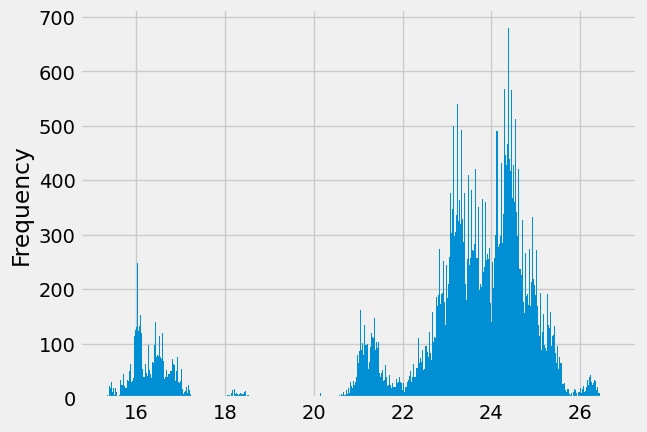

In [41]:
data['Close'].plot(kind='hist', bins=500)

In [42]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5)
data = data.sort_index()

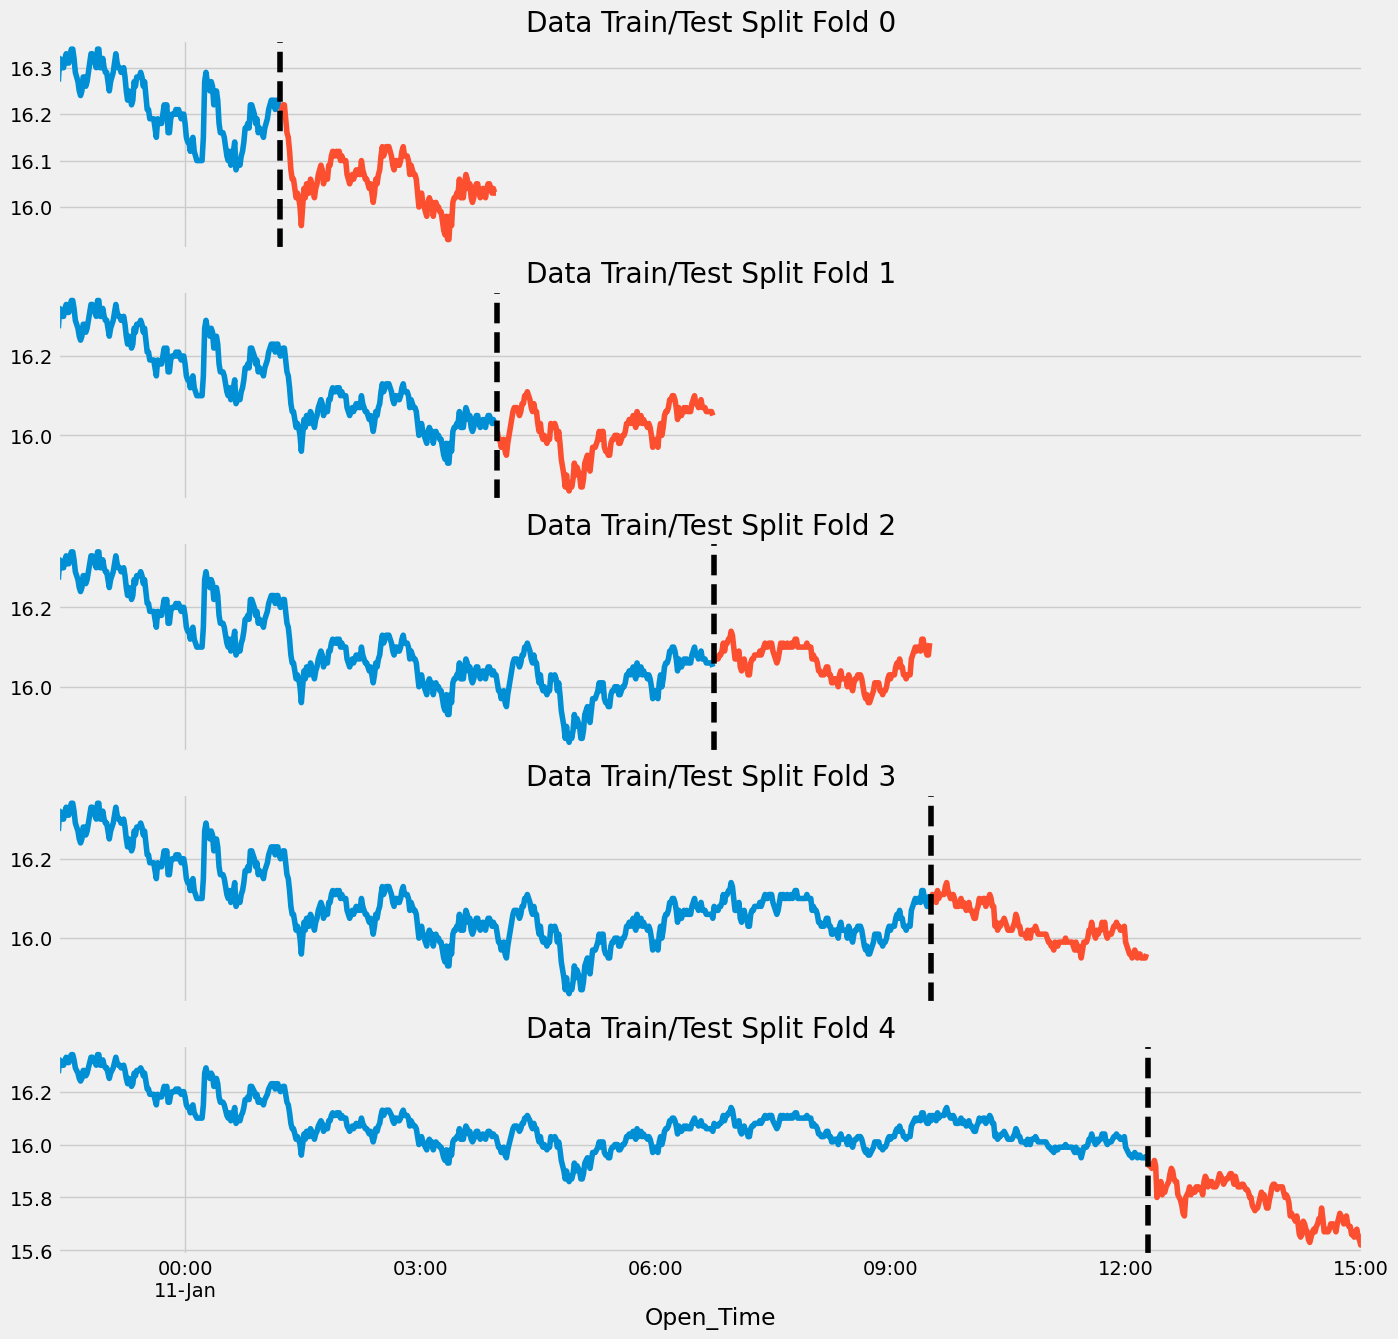

In [43]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = data.iloc[train_idx]
    test = data.iloc[val_idx]
    train['Close'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['Close'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()